# Zadanie 1: Znajdowanie minimum funkcji nielinowej

funkcja:
$$
f(x) = x \cdot \sin(3x) + x^2 \cdot \cos(x)
$$
cel: zmaleźć minimum lokalne w przedziale [-5,5]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
#definicja funkcji
def f(x):
    return x*np.sin(3*x)+x**2*np.cos(x)

In [3]:
#znalezienie minimum w zadanym zakresie
res = minimize_scalar(f,bounds=(-5,5),method='bounded')

In [6]:
res

 message: Solution found.
 success: True
  status: 0
     fun: -15.303011462667769
       x: -3.677702665828064
     nit: 13
    nfev: 13

In [4]:
#wynik:
print("minimum lokalne funkcji:")
print(f"x = {res.x:.4f}, f(x)={res.fun:.4f}")

minimum lokalne funkcji:
x = -3.6777, f(x)=-15.3030


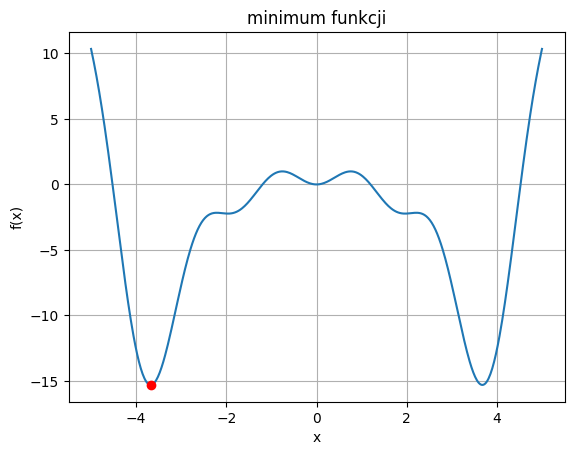

In [5]:
x_vals = np.linspace(-5,5,500)
y_vals = f(x_vals)

plt.plot(x_vals,y_vals,label='f(x)')
plt.plot(res.x,res.fun,'ro',label='Minimum')
plt.title("minimum funkcji")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# Zadanie 2: całkowanie funkcji z szumem

funkcja bazowa:

$$
f(x) = e^{-x^2}
$$

funkcja z szumem:

$$
f(x) = e^{-x^2} + \text{noise}
$$

cel -> obliczyć wartość całki:

$$
\int_0^3 f(x)\,dx
$$

In [7]:
from scipy.integrate import quad

In [8]:
#funkcja bazowa bez szumu
def true_function(x):
    return np.exp(-x**2)

In [9]:
#funkcja z szumem
def noisy_function(x):
    return np.exp(-x**2) + np.random.normal(0,0.01)

In [16]:
#całkowanie wielokrotne
results = []
for _ in range(50):
    result, _ = quad(noisy_function,0,3)
    results.append(result)

#podsumowanie
results = np.array(results)
print(f"średnia wartość całki {results.mean()}")
print(f"odchylenie standarowe: {results.std()}")

średnia wartość całki 0.8862855533793856
odchylenie standarowe: 0.0013648048047986859


/tmp/ipykernel_543/1125486396.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(noisy_function,0,3)


# Zadanie 3: Transformata Fouriera sygnału

definicja sygnału:

$$
s(t) = \sin(2\pi \cdot 5t) + 0.5 \cdot \sin(2\pi \cdot 10t)
$$

częstliwość próbkowania:

$$
f_s = 100 \text{Hz}
$$

transformata Fouriera:

$$
\text{FFT}(s(t)) = S(f)
$$

In [17]:
from scipy.fft import fft,fftfreq

In [18]:
#parametry sygnału
fs = 100 #Hz
t = np.linspace(0,1,fs,endpoint=False)

#sygnał
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*10*t)

In [21]:
#transformaty Fouriera
fft_vals = fft(signal)
fft_freqs = fftfreq(len(t),1/fs)

#widmo apmlitudowe
amplitudes = np.abs(fft_vals[:len(t)//2])
frequencies = fft_freqs[:len(t)//2]

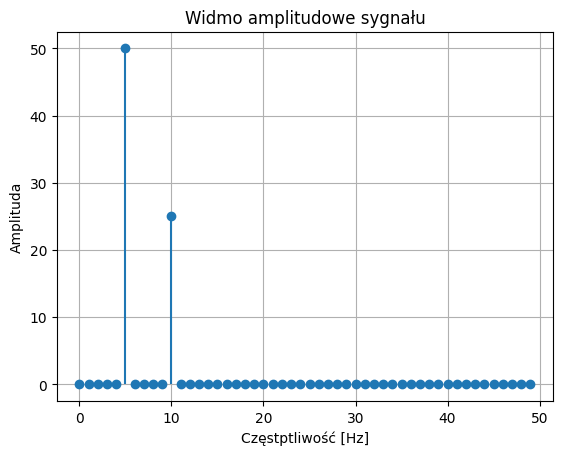

In [23]:
#wykres
plt.stem(frequencies,amplitudes,basefmt=" ")
plt.title("Widmo amplitudowe sygnału")
plt.xlabel("Częstptliwość [Hz]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()